In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Air Quality datasets 
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw
!wget https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
!unzip hourly_42602_2017.zip

--2019-08-09 14:57:20--  https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
Resolving aqs.epa.gov (aqs.epa.gov)... 134.67.21.26
Connecting to aqs.epa.gov (aqs.epa.gov)|134.67.21.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28772736 (27M) [application/zip]
Saving to: ‘hourly_42602_2017.zip’

hourly_42602_2017.z 100%[===================>]  27.44M  1.35MB/s    in 21s     

2019-08-09 14:57:42 (1.32 MB/s) - ‘hourly_42602_2017.zip’ saved [28772736/28772736]

Archive:  hourly_42602_2017.zip
  inflating: hourly_42602_2017.csv   


In [76]:
!ls

LICENSE                    hourly_42602_2017.csv
README.md                  hourly_42602_2017.zip
air_quality_notebook.ipynb images


In [77]:
# Load dataset 
aq_data = pd.read_csv('./hourly_42602_2017.csv')
# aq_data = pd.read_csv('/Users/kkbankol@us.ibm.com/Downloads/hourly_42602_2017.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
# View first 5 rows
aq_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19


In [79]:
# View titles of all columns
aq_data.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Measurement',
       'Units of Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method Type',
       'Method Code', 'Method Name', 'State Name', 'County Name',
       'Date of Last Change'],
      dtype='object')

In [80]:
aq_data['Sample Measurement'].describe()

count    3.558683e+06
mean     8.250732e+00
std      9.166534e+00
min     -5.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.130000e+01
max      1.296000e+02
Name: Sample Measurement, dtype: float64

In [81]:
# print list of all unique monitoring site numbers
aq_data['Site Num'].unique()

array([  23, 2059,   34,   19, 3002, 4011, 4019, 4020, 9997, 1011, 1028,
          5,    7,    9,   11,   12,   13, 2005,    8,    2, 1002, 1004,
       2007,  242, 2016, 4001, 5001, 1005, 1003,   14, 2012, 6001,   16,
        113, 1103, 1201, 1302, 1602, 1701, 4006, 4008, 5005, 6012, 9033,
          4,    1,    3,    6, 1016, 8001, 8005, 9001,   10,   15,   26,
         27,  306, 1234, 2002, 9004, 1006, 1008, 1014, 1017, 1022, 3005,
       4002, 8002, 1001, 1013, 1018, 1021, 1025, 2004, 2011, 4003, 3001,
       7004,   28, 7001, 7003, 9003,   25,   41,   43,   50,   51,   35,
         32,  108, 1065,   21,   18,   56,   63,   76, 3103,   22,   78,
         87,   30,   17,   67,   75, 1024, 1100,   29,   40, 2006, 4005,
       3003,   42,   44,   93,   94,   95, 1010,   20,  423,  480,  962,
         85,   86,  760,  761,  762,  540,  561, 1501, 1502, 1233,  110,
        133,  124,  125,   45,   60,   73,   37,   38,   48,  101,   65,
         33,   97, 9021, 1127,   80, 1376,  100, 40

In [82]:
# get number of aq sites in a single state, "California"
aq_data.loc[aq_data['State Name'] == "California"]['Site Num'].unique().shape

(66,)

In [83]:
# show data associated 
los_angeles_aq = aq_data.loc[ \
                     (aq_data['Longitude'] > -118.455937) & \
                     (aq_data['Longitude'] < -117.842111) & \
                     (aq_data['Latitude'] > 33.764836) & \
                     (aq_data['Latitude'] < 34.173729) ]
los_angeles_aq

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
308750,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308751,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308752,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308753,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308754,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308755,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308756,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308757,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308758,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308759,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27


In [84]:
import datetime as dt

# foo = ((los_angeles_aq['Date Local'].astype(str) + " " + los_angeles_aq['Time Local']) - dt.datetime(1970,1,1)).dt.total_seconds()
# los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local']))).dt.total_seconds()
los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local'])) - dt.datetime(1970,1,1)).dt.total_seconds()
# .date.astype('int64')

# los_angeles_aq['Date']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [85]:
los_angeles_aq['Timestamp']
# import time, datetime
# s = los_angeles_aq.iloc[0]['Date Local'] + '-' + los_angeles_aq.iloc[0]['Time Local']
# int(time.mktime(datetime.datetime.strptime(s, "%Y-%d-%m-%H:%M").timetuple()))
# los_angeles_aq['Timestamp'] = pd.to_datetime([los_angeles_aq['Date Local'] + los_angeles_aq['Time Local'] ])
# los_angeles_aq.iloc[0]['Date Local'] + los_angeles_aq.iloc[0]['Time Local']

308750    1.483229e+09
308751    1.483232e+09
308752    1.483236e+09
308753    1.483240e+09
308754    1.483243e+09
308755    1.483247e+09
308756    1.483250e+09
308757    1.483254e+09
308758    1.483258e+09
308759    1.483261e+09
308760    1.483265e+09
308761    1.483268e+09
308762    1.483272e+09
308763    1.483276e+09
308764    1.483279e+09
308765    1.483283e+09
308766    1.483286e+09
308767    1.483290e+09
308768    1.483294e+09
308769    1.483297e+09
308770    1.483301e+09
308771    1.483304e+09
308772    1.483308e+09
308773    1.483312e+09
308774    1.483315e+09
308775    1.483319e+09
308776    1.483322e+09
308777    1.483326e+09
308778    1.483330e+09
308779    1.483333e+09
              ...     
494017    1.514574e+09
494018    1.514578e+09
494019    1.514581e+09
494020    1.514585e+09
494021    1.514588e+09
494022    1.514592e+09
494023    1.514596e+09
494024    1.514599e+09
494025    1.514603e+09
494026    1.514606e+09
494027    1.514610e+09
494028    1.514614e+09
494029    1

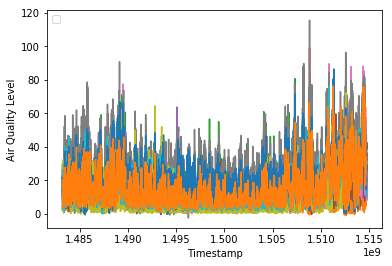

In [86]:
plt.ylabel('Air Quality Level')
plt.xlabel('Timestamp')
plt.legend( los_angeles_aq['Site Num'].unique().tolist(), loc='upper left')
# plt.legend( los_angeles_aq['Site Num'].unique().tolist() )
# colors = [plt.cm.spectral(i) for i in np.linspace(0, 1, los_angeles_aq['Site Num'].unique().shape[0])]
# ax.set_prop_cycle('color', colors)
los_angeles_aq_trimmed = los_angeles_aq
for site in los_angeles_aq['Site Num'].unique():
    plt.plot( los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Timestamp'], los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Sample Measurement'])


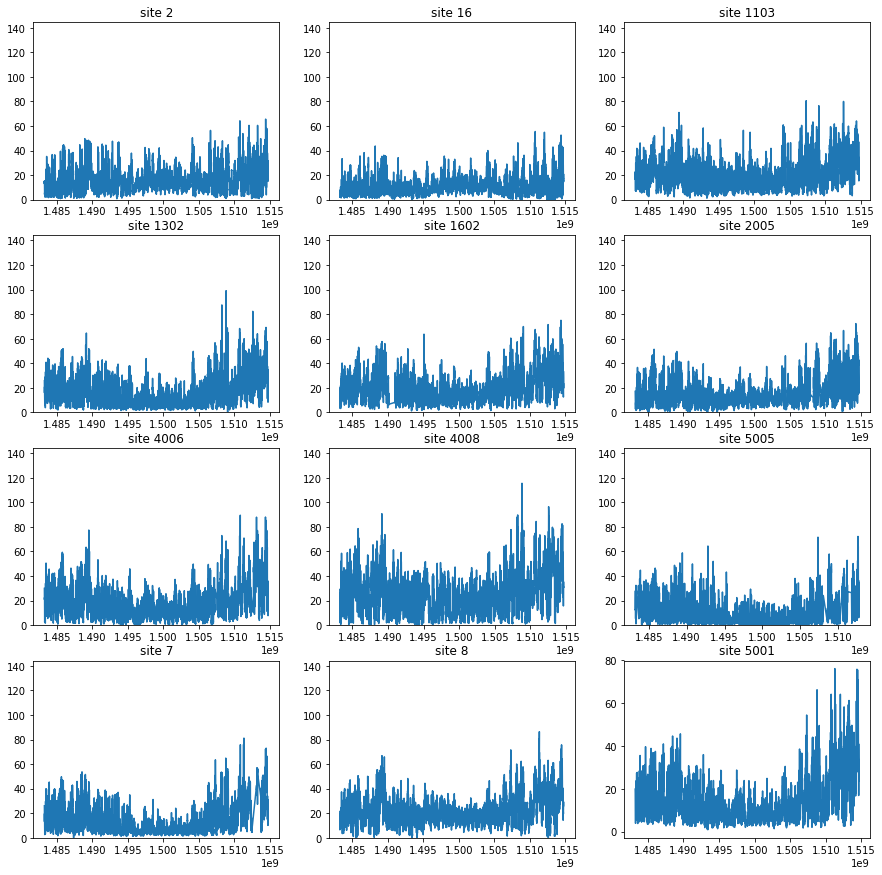

In [87]:
# Print aq changes throughout the year, and create a seperate chart for each air quality monitoring site
ncols = 3
nrows = 4 #los_angeles_aq['Site Num'].unique().shape[0]
plt.subplots(nrows, ncols, figsize=(15,15))
idx = 1
data_summary = los_angeles_aq['Sample Measurement'].describe()
for site in los_angeles_aq['Site Num'].unique():
    plt.ylim(0, data_summary['max'] * 1.25)
    plt.subplot(nrows, ncols, idx)
    plt.plot( los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Timestamp'], los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Sample Measurement'])
    plt.title("site " + str(site))
    idx = idx + 1

In [98]:
# extract day of week
import datetime
los_angeles_aq['Weekday'] = pd.to_datetime(los_angeles_aq['Date Local']).dt.day_name()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


308750      Sunday
308751      Sunday
308752      Sunday
308753      Sunday
308754      Sunday
308755      Sunday
308756      Sunday
308757      Sunday
308758      Sunday
308759      Sunday
308760      Sunday
308761      Sunday
308762      Sunday
308763      Sunday
308764      Sunday
308765      Sunday
308766      Sunday
308767      Sunday
308768      Sunday
308769      Sunday
308770      Sunday
308771      Sunday
308772      Sunday
308773      Sunday
308774      Monday
308775      Monday
308776      Monday
308777      Monday
308778      Monday
308779      Monday
            ...   
494017      Friday
494018      Friday
494019      Friday
494020      Friday
494021      Friday
494022    Saturday
494023    Saturday
494024    Saturday
494025    Saturday
494026    Saturday
494027    Saturday
494028    Saturday
494029    Saturday
494030    Saturday
494031    Saturday
494032    Saturday
494033    Saturday
494034    Saturday
494035    Saturday
494036    Saturday
494037    Saturday
494038    Sa

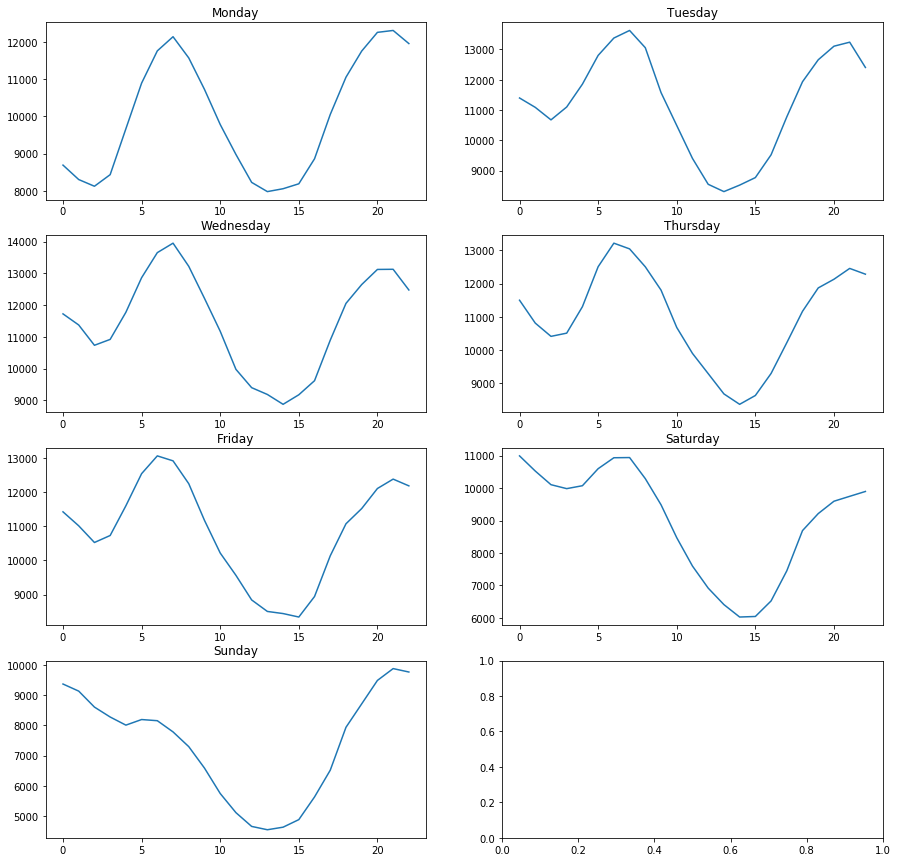

In [99]:
# Print aq changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday
nrows = 4
ncols = 2
plt.subplots(nrows, ncols, figsize=(15,15))
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
idx = 1
values_by_weekday = {}
for day in weekdays:
    plt.subplot(nrows, ncols, idx)
    # for loop 0:00 - 24:00
    # sum measurements where weekday == and time ==
    times = []
    for hour in range(0, 23):
        if hour <= 9:
          time = "0" + str(hour) + ":00"
        else:
          time = str(hour) + ":00"
        # select subset matching given weekday and hour
        subset = los_angeles_aq.loc[ (los_angeles_aq['Weekday'] == day) & (los_angeles_aq['Time Local'] == time) ]['Sample Measurement']
        #         print(subset.mean())
        times.append(subset.sum())
    values_by_weekday[day] = times
    plt.plot( times )
    plt.title(day)
    idx = idx + 1